In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.datasets import load_iris

Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   sepal_length  150 non-null    float64 
 1   sepal_width   150 non-null    float64 
 2   petal_length  150 non-null    float64 
 3   petal_width   150 non-null    float64 
 4   species       150 non-null    category
dtypes: category(1), float64(4)
memory usage: 5.1 KB
None

Sample Data:
   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa

Summary Statistics:
       sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000 

/Users/itschris/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


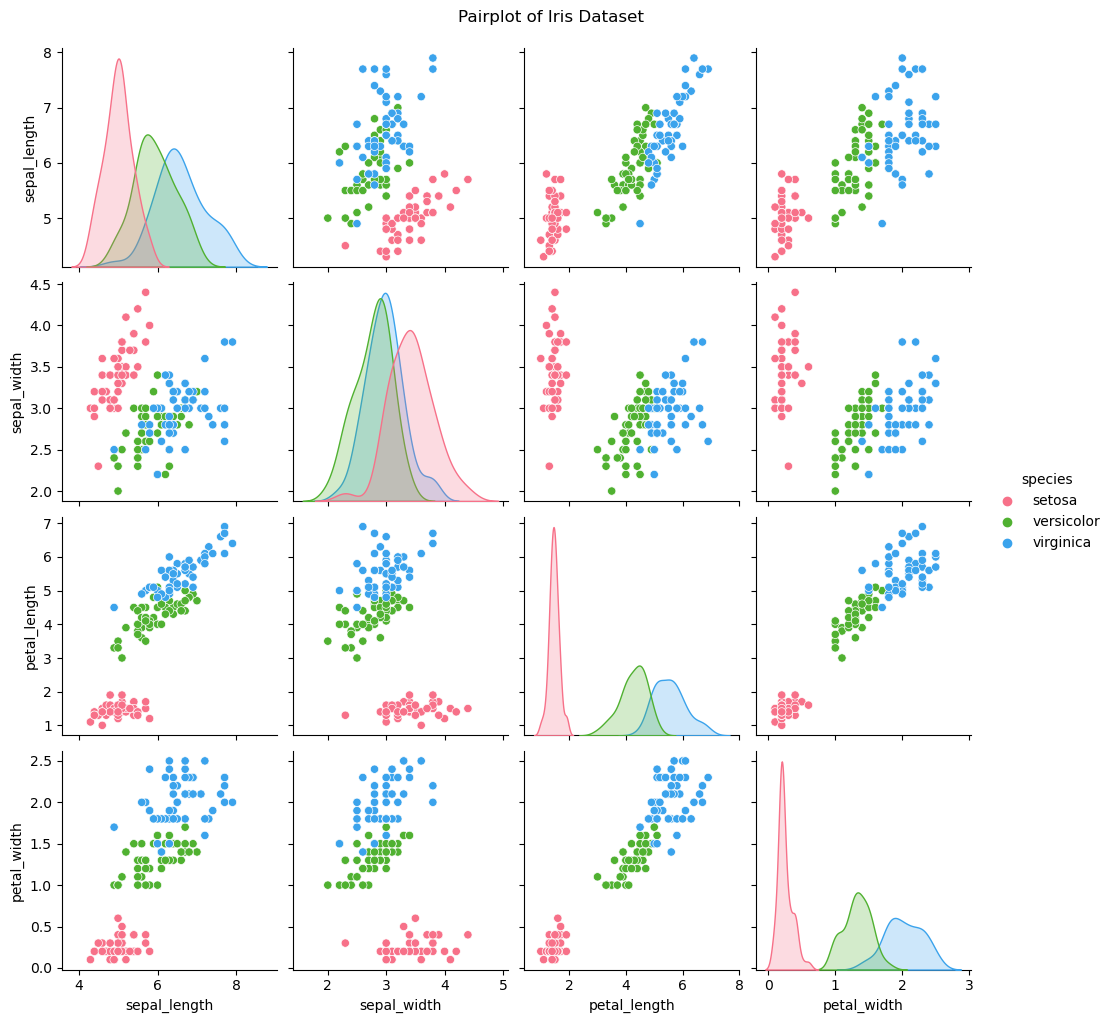

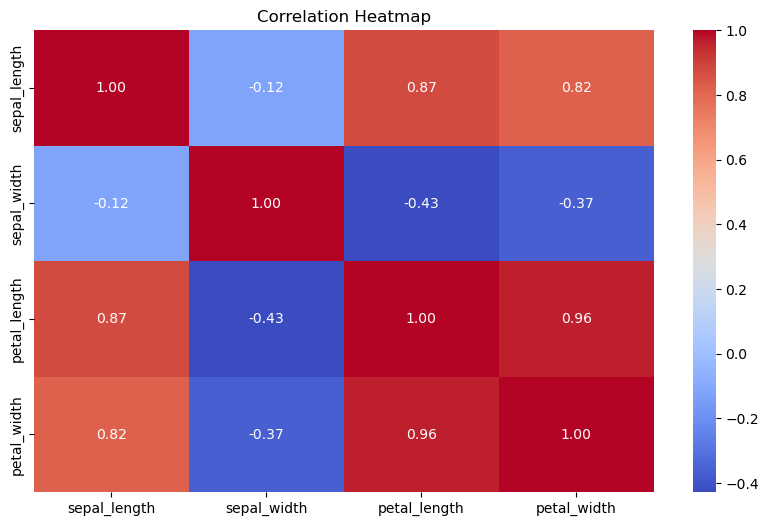

/var/folders/0_/mjbc8mxn0z7_1yr4lv466g880000gn/T/ipykernel_6748/3131614903.py:49: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/var/folders/0_/mjbc8mxn0z7_1yr4lv466g880000gn/T/ipykernel_6748/3131614903.py:49: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/var/folders/0_/mjbc8mxn0z7_1yr4lv466g880000gn/T/ipykernel_6748/3131614903.py:49: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


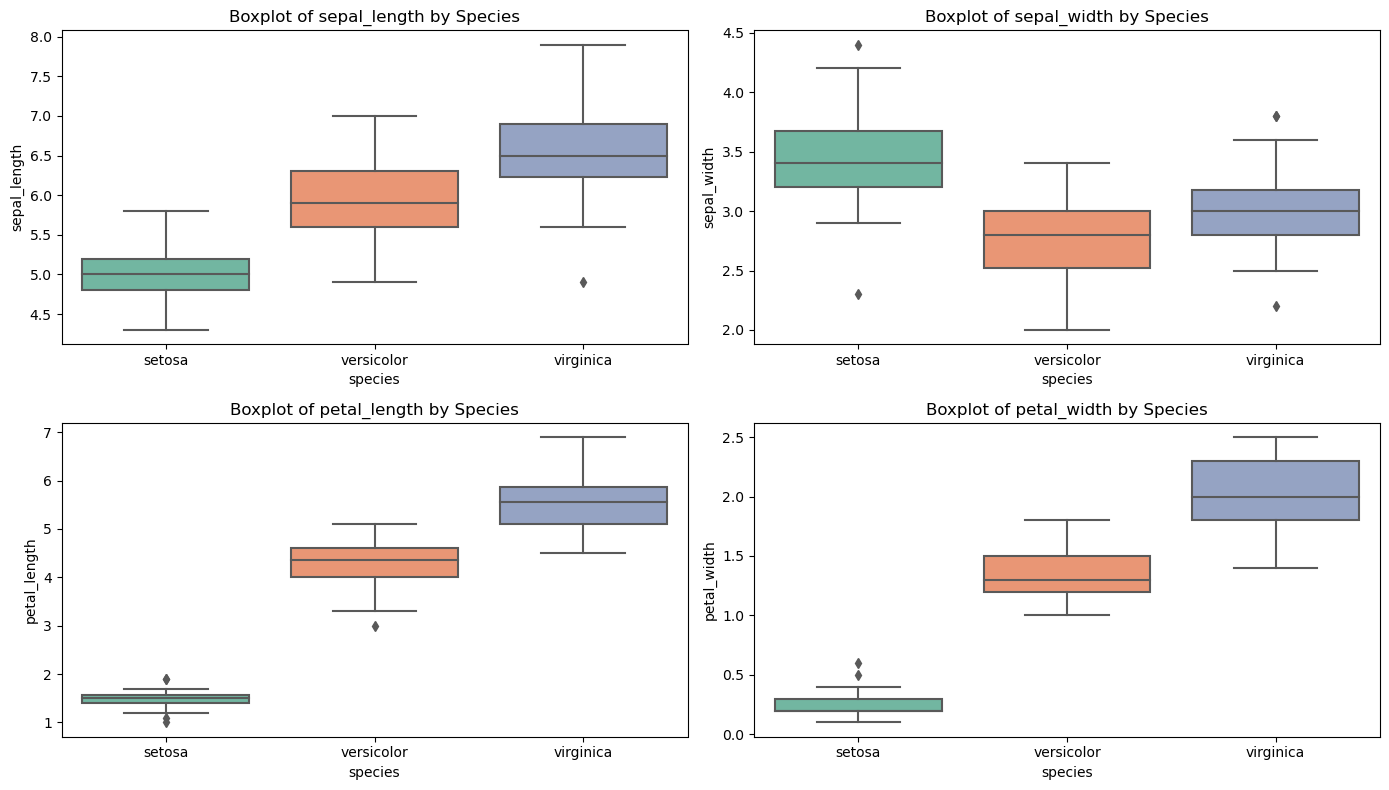

/var/folders/0_/mjbc8mxn0z7_1yr4lv466g880000gn/T/ipykernel_6748/3131614903.py:58: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/var/folders/0_/mjbc8mxn0z7_1yr4lv466g880000gn/T/ipykernel_6748/3131614903.py:58: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/var/folders/0_/mjbc8mxn0z7_1yr4lv466g880000gn/T/ipykernel_6748/3131614903.py:58: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


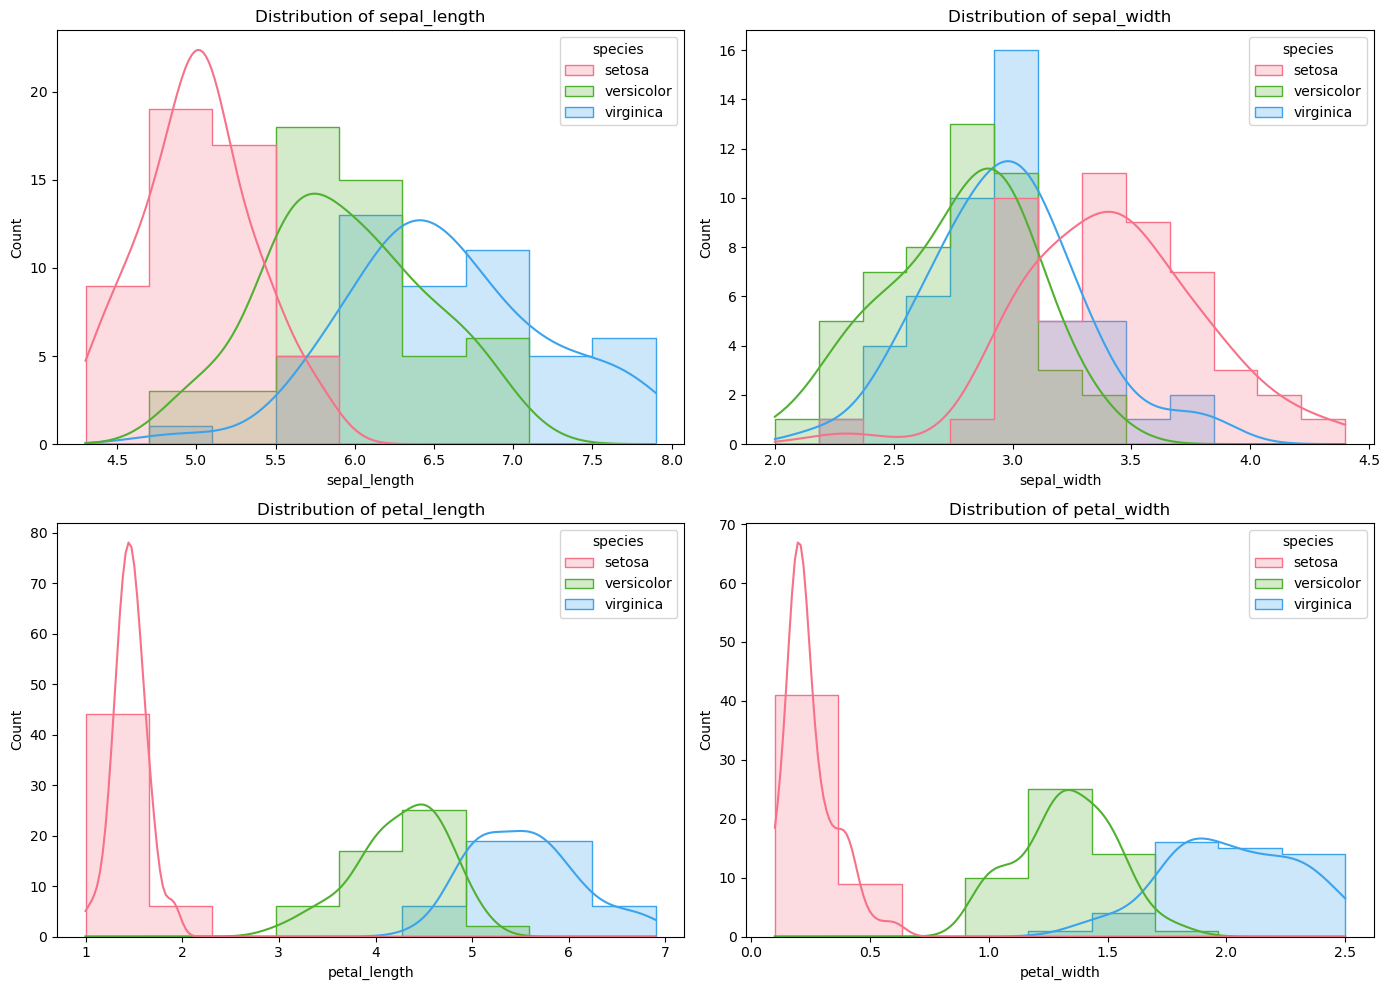

AttributeError: 'DataFrame' object has no attribute 'iteritems'

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.manifold import TSNE
from sklearn.datasets import load_iris

# Load the Iris dataset
iris = load_iris()
data = pd.DataFrame(
    iris.data, columns=iris.feature_names
)
data['species'] = pd.Categorical.from_codes(iris.target, iris.target_names)

# Rename columns for clarity
data.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']

# Dataset Overview
print("Dataset Overview:")
print(data.info())
print("\nSample Data:")
print(data.head())

# Summary statistics (only for numerical columns)
print("\nSummary Statistics:")
print(data.describe())

# Check for missing values
print("\nMissing Values:")
print(data.isnull().sum())

# Pairplot for overall relationships
sns.pairplot(data, hue="species", diag_kind="kde", palette="husl")
plt.suptitle("Pairplot of Iris Dataset", y=1.02)
plt.show()

# Correlation heatmap (numerical columns only)
plt.figure(figsize=(10, 6))
sns.heatmap(data.iloc[:, :-1].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

# Boxplots for feature distributions
plt.figure(figsize=(14, 8))
for i, col in enumerate(['sepal_length', 'sepal_width', 'petal_length', 'petal_width'], 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x="species", y=col, data=data, palette="Set2")
    plt.title(f"Boxplot of {col} by Species")
    plt.tight_layout()
plt.show()

# Distribution plots for each feature
plt.figure(figsize=(14, 10))
for i, col in enumerate(['sepal_length', 'sepal_width', 'petal_length', 'petal_width'], 1):
    plt.subplot(2, 2, i)
    sns.histplot(data, x=col, hue="species", kde=True, element="step", palette="husl")
    plt.title(f"Distribution of {col}")
    plt.tight_layout()
plt.show()

# Interactive scatter plots with Plotly (numerical columns only)
fig = px.scatter_matrix(
    data,
    dimensions=['sepal_length', 'sepal_width', 'petal_length', 'petal_width'],
    color='species',
    title="Scatter Matrix (Interactive)",
    labels={'species': 'Species'},
    height=700
)
fig.update_traces(diagonal_visible=False)
fig.show()

# Violin plots for distributions and density
plt.figure(figsize=(14, 10))
for i, col in enumerate(['sepal_length', 'sepal_width', 'petal_length', 'petal_width'], 1):
    plt.subplot(2, 2, i)
    sns.violinplot(x="species", y=col, data=data, palette="muted", split=True)
    plt.title(f"Violin Plot of {col} by Species")
    plt.tight_layout()
plt.show()

# t-SNE visualization for dimensionality reduction (numerical data only)
# Extract only numerical columns
numeric_data = data.iloc[:, :-1]  # Exclude the 'species' column

# Perform t-SNE
tsne = TSNE(n_components=2, random_state=42, perplexity=30)
tsne_result = tsne.fit_transform(numeric_data)

# Convert results to DataFrame
tsne_df = pd.DataFrame(tsne_result, columns=['TSNE_1', 'TSNE_2'])
tsne_df['species'] = data['species']  # Add species back for visualization

# Plot the t-SNE results
plt.figure(figsize=(8, 6))
sns.scatterplot(data=tsne_df, x="TSNE_1", y="TSNE_2", hue="species", palette="deep", s=100)
plt.title("t-SNE Visualization")
plt.show()

# Insights
print("\nInsights:")
print("1. Petal length and petal width are highly correlated with each other.")
print("2. Setosa species is well-separated in terms of petal features.")
print("3. Versicolor and Virginica show overlapping distributions, especially in petal width.")
